# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [16]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
plt.gcf().autofmt_xdate()

<Figure size 432x288 with 0 Axes>

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'

soup = BeautifulSoup(resp.text, 'lxml')
print((soup.find_all('div')[0].find('div', class_='visible-phone print_hide').text).replace(' ',''))
rate = soup.find_all('div')[0]
print('現金買入：{}'.format(rate.find('td', {'data-table':'本行現金買入'}).text))
print('現金賣出：{}'.format(rate.find('td', {'data-table':'本行現金賣出'}).text))
print('即期買入：{}'.format(rate.find('td', {'data-table':'本行即期買入'}).text))
print('即期賣出：{}'.format(rate.find('td', {'data-table':'本行即期賣出'}).text))


美金(USD)

現金買入：29.72
現金賣出：30.39
即期買入：30.07
即期賣出：30.17


In [3]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.72, 即時現金賣出: 30.39


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [4]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'

soup = BeautifulSoup(resp.text, 'lxml')
n = len(soup.find_all('div', class_="visible-phone print_hide"))
for i in range(n):
    print((soup.find_all('div')[0].find_all('div', class_='visible-phone print_hide')[i].text).replace(' ',''))
    rate = soup.find_all('div')[0]
    print('現金買入：{}'.format(rate.find_all('td', {'data-table':'本行現金買入'})[i].text))
    print('現金賣出：{}'.format(rate.find_all('td', {'data-table':'本行現金賣出'})[i].text))
    print('即期買入：{}'.format(rate.find_all('td', {'data-table':'本行即期買入'})[i].text))
    print('即期賣出：{}'.format(rate.find_all('td', {'data-table':'本行即期賣出'})[i].text))
    print('-----------------')


美金(USD)

現金買入：29.72
現金賣出：30.39
即期買入：30.07
即期賣出：30.17
-----------------

港幣(HKD)

現金買入：29.72
現金賣出：30.39
即期買入：30.07
即期賣出：30.17
-----------------

英鎊(GBP)

現金買入：3.72
現金賣出：3.924
即期買入：3.846
即期賣出：3.906
-----------------

澳幣(AUD)

現金買入：3.72
現金賣出：3.924
即期買入：3.846
即期賣出：3.906
-----------------

加拿大幣(CAD)

現金買入：37.5
現金賣出：39.62
即期買入：38.5
即期賣出：38.92
-----------------

新加坡幣(SGD)

現金買入：37.5
現金賣出：39.62
即期買入：38.5
即期賣出：38.92
-----------------

瑞士法郎(CHF)

現金買入：19.06
現金賣出：19.84
即期買入：19.33
即期賣出：19.56
-----------------

日圓(JPY)

現金買入：19.06
現金賣出：19.84
即期買入：19.33
即期賣出：19.56
-----------------

南非幣(ZAR)

現金買入：21.32
現金賣出：22.23
即期買入：21.71
即期賣出：21.93
-----------------

瑞典幣(SEK)

現金買入：21.32
現金賣出：22.23
即期買入：21.71
即期賣出：21.93
-----------------

紐元(NZD)

現金買入：20.98
現金賣出：21.89
即期買入：21.47
即期賣出：21.65
-----------------

泰幣(THB)

現金買入：20.98
現金賣出：21.89
即期買入：21.47
即期賣出：21.65
-----------------

菲國比索(PHP)

現金買入：31.46
現金賣出：32.66
即期買入：32.12
即期賣出：32.41
-----------------

印尼幣(IDR)

現金買入：31.46
現金賣出：32.66
即期買入：32.12
即期賣出：32.41
-----

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



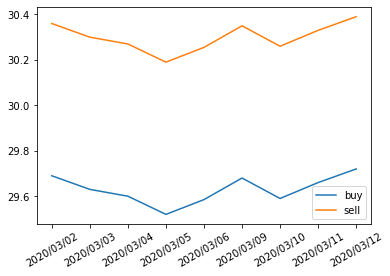

In [25]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'

soup = BeautifulSoup(resp.text, 'lxml')
print((soup.find_all('div')[0].find('div', class_='visible-phone print_hide').text).replace(' ',''))
histurl = ('https://rate.bot.com.tw' + soup.find_all('td', {'data-table':'歷史匯率'})[0].find('a').attrs['href']).replace('history','quote/2020-03')
hist_resp = requests.get(histurl)
hist_soup = BeautifulSoup(hist_resp.text,'lxml')
hist_soup.encoding = 'utf-8'
hist_soup

time = []
buy = []
sell = []
hist = hist_soup.find('tbody')
for i in range(len(hist.find_all('td', class_='rate-content-cash text-right print_table-cell'))):
    if i % 2 == 0:
        time = time + [hist.find_all('a')[int(i/2)].text]
        buy = buy + [hist.find_all('td', class_='rate-content-cash text-right print_table-cell')[i].text]
    else:
        sell = sell + [hist.find_all('td', class_='rate-content-cash text-right print_table-cell')[i].text]

histdata = pd.DataFrame({'buy':buy, 'sell':sell}, index=time)
histdata.sort_index(inplace=True)
histdata = histdata.astype('float64')

# print(histdata)

plt.plot(histdata['buy'], label='buy')
plt.plot(histdata['sell'], label='sell')
plt.xticks(rotation=30)
plt.legend(loc='best')
plt.show()


美金(USD)



<Figure size 720x576 with 0 Axes>

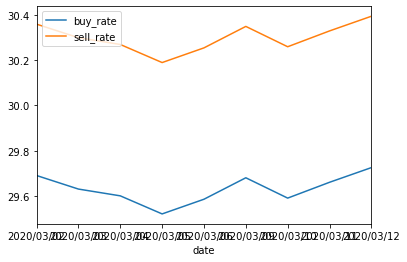

In [27]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2020-03")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

In [54]:
def currency(date):
    url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
    resp = requests.get(url)
    resp.encoding = 'utf-8'

    soup = BeautifulSoup(resp.text, 'lxml')
    currency = soup.find('tbody').find_all('div', class_='visible-phone print_hide')
    soup.find('tbody').find_all('td', {'data-table':'歷史匯率'})
    for i in range(len(currency)):
        print((currency[i].text).replace(' ',''))
        histurl = ('https://rate.bot.com.tw' + soup.find('tbody').find_all('td', {'data-table':'歷史匯率'})[i].find('a').attrs['href']).replace('history','quote/'+date)
        hist_resp = requests.get(histurl)
        hist_soup = BeautifulSoup(hist_resp.text,'lxml')
        hist_soup.encoding = 'utf-8'

        time = []
        buy = []
        sell = []
        hist = hist_soup.find('tbody')
        hist
        for j in range(len(hist.find_all('td', class_='rate-content-cash text-right print_table-cell'))):
            if j % 2 == 0:
                time = time + [hist.find_all('a')[int(j/2)].text]
                buy = buy + [hist.find_all('td', class_='rate-content-cash text-right print_table-cell')[j].text]
            else:
                sell = sell + [hist.find_all('td', class_='rate-content-cash text-right print_table-cell')[j].text]

        histdata = pd.DataFrame({'buy':buy, 'sell':sell}, index=time)
        histdata.sort_index(inplace=True)
        histdata = histdata.astype('float64')

        # print(histdata)

        plt.plot(histdata['buy'], label='buy')
        plt.plot(histdata['sell'], label='sell')
        plt.xticks(rotation=30)
        plt.legend(loc=1)
        plt.show()


美金(USD)



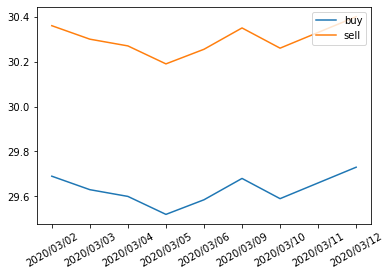


港幣(HKD)



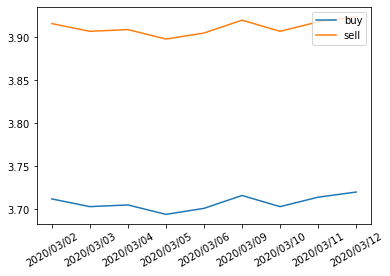


英鎊(GBP)



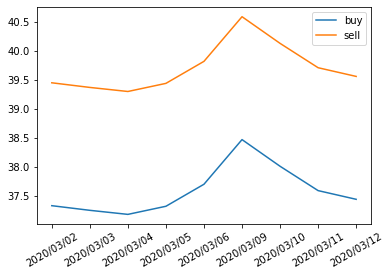


澳幣(AUD)



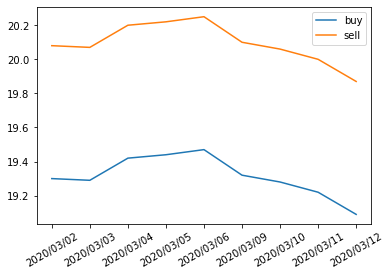


加拿大幣(CAD)



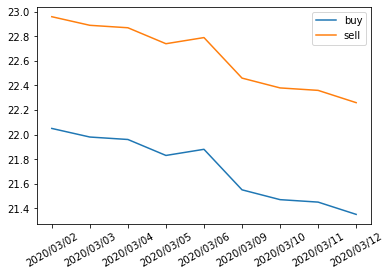


新加坡幣(SGD)



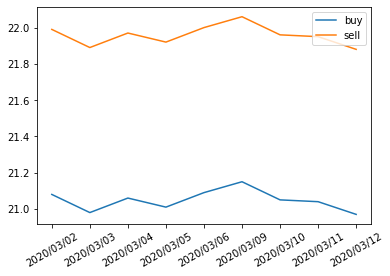


瑞士法郎(CHF)



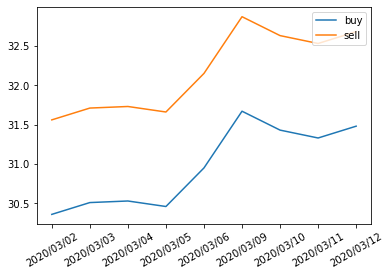


日圓(JPY)



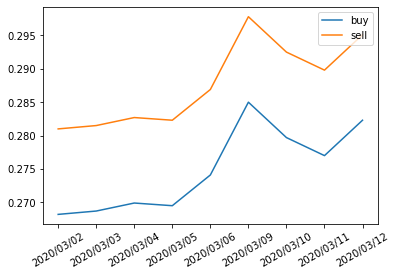


南非幣(ZAR)



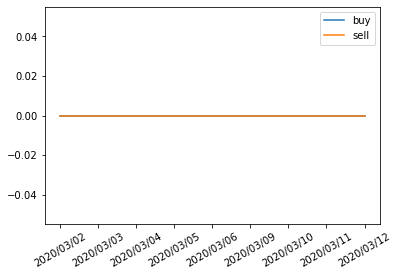


瑞典幣(SEK)



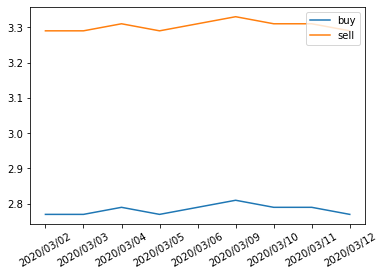


紐元(NZD)



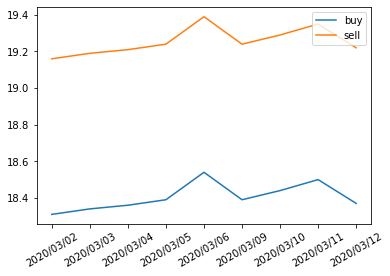


泰幣(THB)



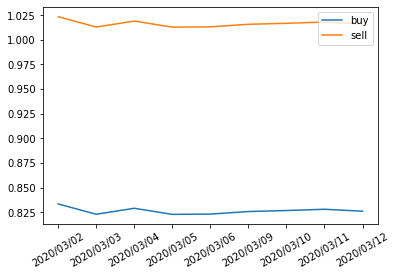


菲國比索(PHP)



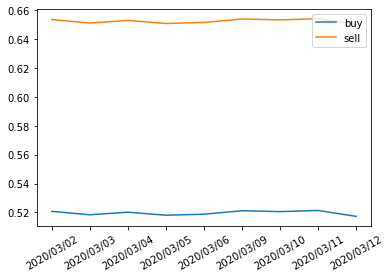


印尼幣(IDR)



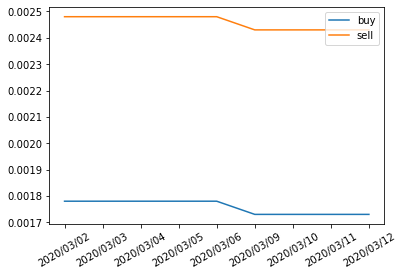


歐元(EUR)



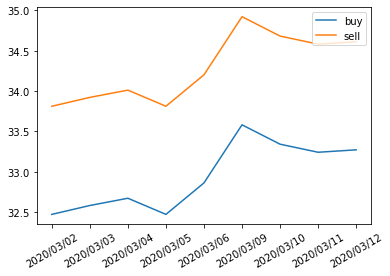


韓元(KRW)



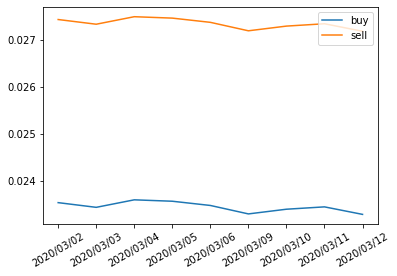


越南盾(VND)



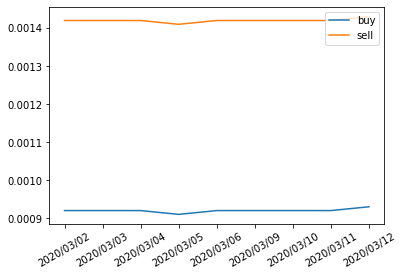


馬來幣(MYR)



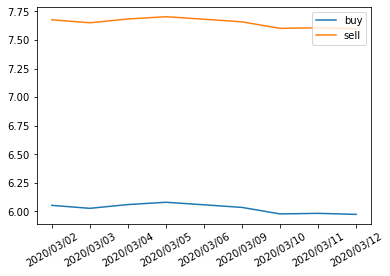


人民幣(CNY)



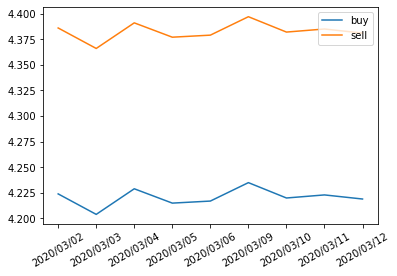

In [55]:
currency('2020-03')